<a href="https://colab.research.google.com/github/Hafidahmad11/Classification/blob/main/TUBESCLASSIFICATION_HafidAhmad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random as rd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from scipy.spatial.distance import cdist
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from scipy import stats

Import Dataset

In [ ]:
!gdown --id 17aM95b9gQKR2RbMxzOd1DVgyaL7C-qq3 

#upload file excel(csv) kendaraan_test

Downloading...
From: https://drive.google.com/uc?id=17aM95b9gQKR2RbMxzOd1DVgyaL7C-qq3
To: /content/kendaraan_test.csv
100% 2.31M/2.31M [00:00<00:00, 74.1MB/s]


In [ ]:
!gdown --id 1BRl5PcnsUTgjYolmnF7B7Jm5ezTSwpbA

#upload file excel(csv) kendaraan_train

Downloading...
From: https://drive.google.com/uc?id=1BRl5PcnsUTgjYolmnF7B7Jm5ezTSwpbA
To: /content/kendaraan_train.csv
100% 15.2M/15.2M [00:00<00:00, 126MB/s]


Kendaraan Test

In [ ]:
kendaraan_test = pd.read_csv('kendaraan_test.csv')

In [ ]:
kendaraan_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0
...,...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,124,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,157,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,152,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,26,239,1


Kendaraan Train

In [ ]:
kendaraan_train = pd.read_csv('kendaraan_train.csv')
kendaraan_train

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


Drop columns yang tidak di perlukan atau tidak digunakan pada dataset

In [ ]:
kendaraan_train.drop(['id', 'Kanal_Penjualan'], axis=1, inplace=True)

In [ ]:
kendaraan_test.drop(['Kanal_Penjualan'], axis=1, inplace=True)

In [ ]:
kendaraan_train.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Lama_Berlangganan,Tertarik
0,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,97.0,0
1,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,158.0,0
2,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,119.0,0
3,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,63.0,0
4,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,194.0,0


In [ ]:
kendaraan_test

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,229,0
...,...,...,...,...,...,...,...,...,...,...
47634,Pria,61,1,46,0,> 2 Tahun,Pernah,31039,67,0
47635,Pria,41,1,15,0,1-2 Tahun,Pernah,2630,232,0
47636,Pria,24,1,29,1,< 1 Tahun,Tidak,33101,211,0
47637,Pria,59,1,30,0,1-2 Tahun,Pernah,37788,239,1


melihat dimensi dataset

In [ ]:
kendaraan_train.shape

(285831, 10)

In [ ]:
kendaraan_test.shape

(47639, 10)

In [ ]:
kendaraan_train.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Lama_Berlangganan,Tertarik
count,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271839.000000,285831.000000
mean,38.844336,0.997848,26.405410,0.458778,30536.683472,154.286302,0.122471
std,15.522487,0.046335,13.252714,0.498299,17155.000770,83.694910,0.327830
min,20.000000,0.000000,0.000000,0.000000,2630.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24398.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31646.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39377.750000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,299.000000,1.000000


In [ ]:
kendaraan_test.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Lama_Berlangganan,Tertarik
count,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000,47639.000000
mean,38.815466,0.997922,26.331514,0.457608,30626.481202,154.447574,0.123029
std,15.548817,0.045540,13.213353,0.498205,17404.792248,83.642137,0.328474
min,20.000000,0.000000,0.000000,0.000000,2630.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24395.500000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31738.000000,155.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39474.500000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,299.000000,1.000000


Cek dataset yang bernilai null

In [ ]:
kendaraan_train.isnull().sum()

Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

In [ ]:
# categorical features
col_cat = [i for i in kendaraan_train.select_dtypes(include='object')]
label_encoded_col = ['SIM', 'Sudah_Asuransi', 'Kode_Daerah']
col_cat.extend(label_encoded_col)

#filling mising values with mode()

for col in col_cat:
  kendaraan_train[col]= kendaraan_train[col].fillna(kendaraan_train[col].mode()[0])

In [ ]:
#numerical features

col_num = [i for i in kendaraan_train.select_dtypes(exclude='object')]
for i in label_encoded_col:
    col_num.remove(i)

#filling missing values with mean()

for col in col_num:
  kendaraan_train[col] = kendaraan_train[col].fillna(kendaraan_train[col].mean())

In [ ]:
kendaraan_train.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

In [ ]:
kendaraan_test.isnull().sum()

Jenis_Kelamin        0
Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Umur_Kendaraan       0
Kendaraan_Rusak      0
Premi                0
Lama_Berlangganan    0
Tertarik             0
dtype: int64

## Outliers

Cek Outlier pada dataset

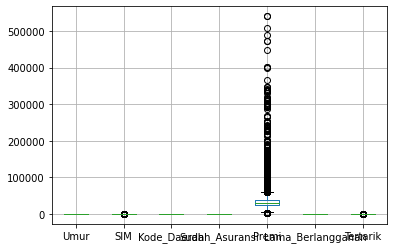

In [ ]:
kendaraan_train.boxplot()

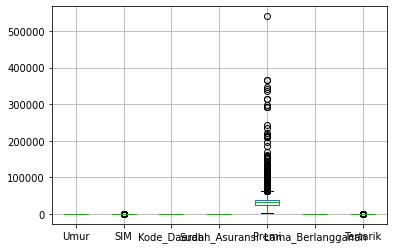

In [ ]:
kendaraan_test.boxplot()

In [ ]:
 kendaraan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Jenis_Kelamin      285831 non-null  object 
 1   Umur               285831 non-null  float64
 2   SIM                285831 non-null  float64
 3   Kode_Daerah        285831 non-null  float64
 4   Sudah_Asuransi     285831 non-null  float64
 5   Umur_Kendaraan     285831 non-null  object 
 6   Kendaraan_Rusak    285831 non-null  object 
 7   Premi              285831 non-null  float64
 8   Lama_Berlangganan  285831 non-null  float64
 9   Tertarik           285831 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 21.8+ MB


In [ ]:
kendaraan_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47639 entries, 0 to 47638
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Jenis_Kelamin      47639 non-null  object
 1   Umur               47639 non-null  int64 
 2   SIM                47639 non-null  int64 
 3   Kode_Daerah        47639 non-null  int64 
 4   Sudah_Asuransi     47639 non-null  int64 
 5   Umur_Kendaraan     47639 non-null  object
 6   Kendaraan_Rusak    47639 non-null  object
 7   Premi              47639 non-null  int64 
 8   Lama_Berlangganan  47639 non-null  int64 
 9   Tertarik           47639 non-null  int64 
dtypes: int64(7), object(3)
memory usage: 3.6+ MB


## Data Transformation

Encode Dataset
agar mudah dibandingkan

In [ ]:
encoder = LabelEncoder()

#Jenis_Kelamin   : wanita = 0, pria = 1
#Umur_Kendaraan  : < 1 tahun = 3, 1-2 tahun = 2, > 2 tahun = 1
#Kendaraan_Rusak : Tidak = 0 , Pernah = 1

kendaraan_train['Jenis_Kelamin'] = encoder.fit_transform(kendaraan_train['Jenis_Kelamin'])
kendaraan_train['Umur_Kendaraan'] = encoder.fit_transform(kendaraan_train['Umur_Kendaraan'])
kendaraan_train['Kendaraan_Rusak'] = encoder.fit_transform(kendaraan_train['Kendaraan_Rusak'])

kendaraan_test['Jenis_Kelamin'] = encoder.fit_transform(kendaraan_test['Jenis_Kelamin'])
kendaraan_test['Umur_Kendaraan'] = encoder.fit_transform(kendaraan_test['Umur_Kendaraan'])
kendaraan_test['Kendaraan_Rusak'] = encoder.fit_transform(kendaraan_test['Kendaraan_Rusak'])


#normalisasi ConcatDataset

scaler = MinMaxScaler()

kendaraan_train[['Premi']] = scaler.fit_transform(kendaraan_train[['Premi']])
kendaraan_train[['Kode_Daerah']] = scaler.fit_transform(kendaraan_train[['Kode_Daerah']])

kendaraan_test[['Premi']] = scaler.fit_transform(kendaraan_test[['Premi']])
kendaraan_test[['Kode_Daerah']] = scaler.fit_transform(kendaraan_test[['Kode_Daerah']])


In [ ]:
kendaraan_train.head(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,0.634615,1.0,1,1,0.047251,97.0,0
1,0,48.0,1.0,0.750000,0.0,2,0,0.043104,158.0,0
2,0,21.0,1.0,0.884615,1.0,1,1,0.056002,119.0,0
3,1,58.0,1.0,0.923077,0.0,0,1,0.000000,63.0,0
4,0,50.0,1.0,0.673077,0.0,2,0,0.059953,194.0,0
5,0,21.0,1.0,0.673077,1.0,1,1,0.037402,171.0,0
6,1,33.0,1.0,0.153846,0.0,0,0,0.055448,215.0,1
7,0,23.0,1.0,0.538462,1.0,1,1,0.045093,222.0,0
8,1,20.0,1.0,0.153846,1.0,1,1,0.052380,31.0,0
9,0,54.0,1.0,0.557692,0.0,2,0,0.160460,28.0,1


In [ ]:
kendaraan_test.head(10)

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Lama_Berlangganan,Tertarik
0,1,49,1,0.153846,0,0,0,0.082475,145,0
1,0,22,1,0.903846,1,1,1,0.068822,241,0
2,0,24,1,0.538462,1,1,1,0.200636,62,0
3,0,46,1,0.153846,1,0,1,0.062575,34,0
4,0,35,1,0.442308,0,0,0,0.045268,229,0
5,0,26,1,0.538462,1,1,1,0.074583,198,0
6,1,24,1,0.538462,1,1,1,0.117520,160,0
7,1,40,1,0.538462,0,0,0,0.052743,79,0
8,0,23,1,0.288462,1,1,1,0.055317,219,0
9,1,43,1,0.538462,0,0,0,0.116737,41,1


## Handling Duplicate Data

duplicate values ini adalah nilai nilai yang setiap inplacenya sama persis, oleh karena itu yang duplicate tidak memberi pengaruh pada model kita , maka dilakukan drop duplicate values

In [ ]:
#cek apakah terdapat data yang duplikat pada dataset 
print("Data Train Duplicate", kendaraan_train.duplicated().sum())
print("Data Test Duplicate", kendaraan_test.duplicated().sum())

Data Train Duplicate 1030
Data Test Duplicate 14


In [ ]:
#menghapus data yang duplikat pada dataset
kendaraan_train.drop_duplicates(keep='first', inplace=True)
kendaraan_test.drop_duplicates(keep='first', inplace=True)

In [ ]:
#cek kembali pada dataset apakah masih ada data yang duplikat
print("Data Train Duplicate", kendaraan_train.duplicated().sum())
print("Data Test Duplicate", kendaraan_test.duplicated().sum())

Data Train Duplicate 0
Data Test Duplicate 0


# Data visualisasi

Kita bisa lihat data yang tidak tertarik lebih banyak dengan angka 250000, sedangkan yang tertarik dibawah 50000 data

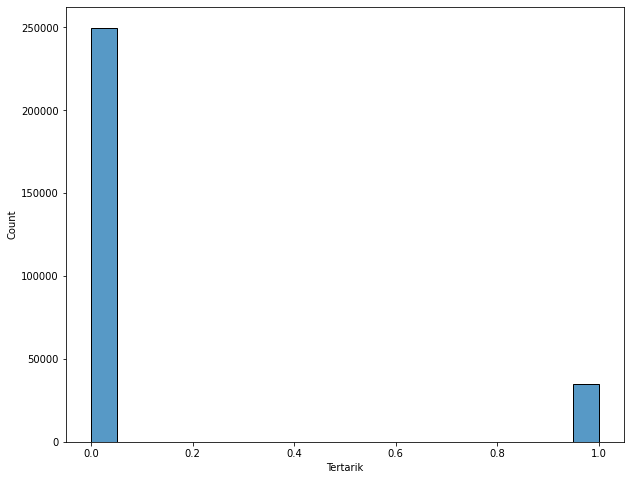

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(data=kendaraan_train, x='Tertarik')

Cek lagi Outlier pada dataset

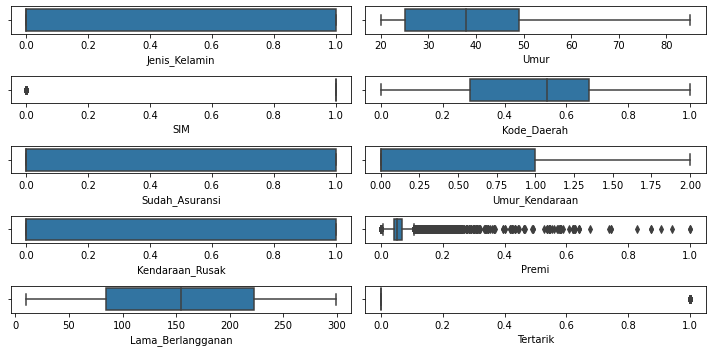

In [ ]:
fig, axs = plt.subplots(5,2, figsize = (10, 5))
plt1 = sns.boxplot(x = kendaraan_train['Jenis_Kelamin'], ax = axs[0,0])
plt2 = sns.boxplot(x = kendaraan_train['Umur'], ax = axs[0,1])
plt3 = sns.boxplot(x = kendaraan_train['SIM'], ax = axs[1,0])
plt4 = sns.boxplot(x = kendaraan_train['Kode_Daerah'], ax = axs[1,1])
plt5 = sns.boxplot(x = kendaraan_train['Sudah_Asuransi'], ax = axs[2,0])
plt6 = sns.boxplot(x = kendaraan_train['Umur_Kendaraan'], ax = axs[2,1])
plt7 = sns.boxplot(x = kendaraan_train['Kendaraan_Rusak'], ax = axs[3,0])
plt8 = sns.boxplot(x = kendaraan_train['Premi'], ax = axs[3,1])
plt9 = sns.boxplot(x = kendaraan_train['Lama_Berlangganan'], ax = axs[4,0])
plt10 = sns.boxplot(x = kendaraan_train['Tertarik'], ax = axs[4,1])

plt.tight_layout()

Seleksi Fitur

In [ ]:
#mengukur kekuatan dan arah hubungan linier dari dua variabel 

def corel(kendaraan_train, threshold):

    corr = kendaraan_train.corr().abs()
    keep = []
    for i in range(len(corr.iloc[:,0])):
        above = corr.iloc[:i,i]
        if len(keep) > 0: above = above[keep]
        if len(above[above < threshold]) == len(above):
            keep.append(corr.columns.values[i])

    return kendaraan_train[keep]

In [ ]:
feature_selection = corel(kendaraan_train, 0.5)
feature_selection

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Premi,Lama_Berlangganan,Tertarik
0,1,30.0,1.0,0.634615,1.0,1,0.047251,97.0,0
1,0,48.0,1.0,0.750000,0.0,2,0.043104,158.0,0
2,0,21.0,1.0,0.884615,1.0,1,0.056002,119.0,0
3,1,58.0,1.0,0.923077,0.0,0,0.000000,63.0,0
4,0,50.0,1.0,0.673077,0.0,2,0.059953,194.0,0
...,...,...,...,...,...,...,...,...,...
285826,1,23.0,1.0,0.076923,1.0,1,0.043454,217.0,0
285827,1,21.0,1.0,0.884615,1.0,1,0.078239,50.0,0
285828,1,23.0,1.0,0.961538,1.0,1,0.087661,226.0,0
285829,0,68.0,1.0,0.134615,1.0,0,0.051853,270.0,0


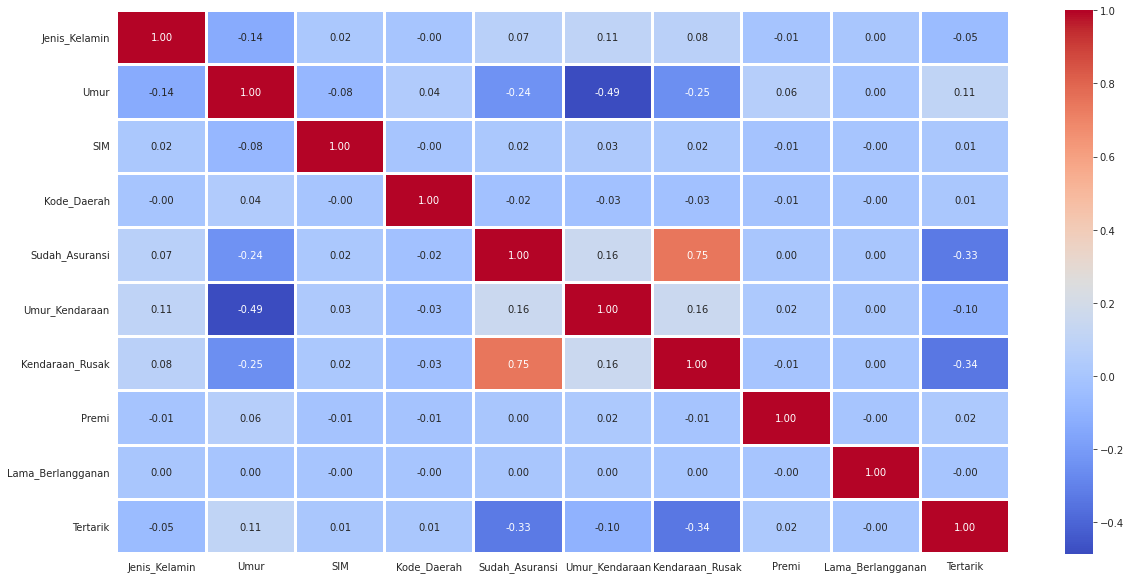

In [ ]:
sns.set({'figure.figsize':(20,10)})
sns.heatmap(kendaraan_train.corr(), annot=True, fmt = '.2f' , linewidths=2, cmap="coolwarm")

In [ ]:
to_drop =['SIM', 'Kode_Daerah', 'Lama_Berlangganan', 'Umur']
kendaraan_train_clean = kendaraan_train.drop(to_drop, axis=1)
kendaraan_test_clean = kendaraan_test.drop(to_drop, axis=1)

**PROSES CLASSIFICATON**


Split Data

In [ ]:
X_train = kendaraan_train.drop('Tertarik', axis=1).to_numpy()
y_train = kendaraan_train['Tertarik'].to_numpy()

In [ ]:
X_test = kendaraan_test.drop('Tertarik', axis=1).to_numpy()
y_test = kendaraan_test['Tertarik'].to_numpy()

In [ ]:
print("Jumlah data Training", X_train.shape[0])
print("Jumlah data Test", X_test.shape[0])

Jumlah data Training 284801
Jumlah data Test 47625


## Scalling Data

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [ ]:
X_train

array([[ 1.13597825, -0.58385392,  0.04532955, ...,  1.05941278,
        -0.1552593 , -0.70156209],
       [-0.88029854,  0.60495232,  0.04532955, ..., -0.94391914,
        -0.28893911,  0.04537779],
       [-0.88029854, -1.17825704,  0.04532955, ...,  1.05941278,
         0.12685367, -0.43217394],
       ...,
       [ 1.13597825, -1.04616745,  0.04532955, ...,  1.05941278,
         1.1474741 ,  0.87803208],
       [-0.88029854,  1.92584814,  0.04532955, ...,  1.05941278,
        -0.00688611,  1.41680838],
       [-0.88029854,  0.40681795,  0.04532955, ..., -0.94391914,
         0.35157248, -1.35054264]])

In [ ]:
X_test

array([[ 1.09025176,  0.65493378,  0.04564067, ..., -0.99078264,
         0.93837795, -0.11299916],
       [-0.91721934, -1.08138449,  0.04564067, ...,  1.00930311,
         0.51660958,  1.03491162],
       [-0.91721934, -0.95276832,  0.04564067, ...,  1.00930311,
         4.58860822, -1.10546369],
       ...,
       [-0.91721934, -0.95276832,  0.04564067, ...,  1.00930311,
         0.14173629,  0.6761895 ],
       [-0.91721934,  1.29801462,  0.04564067, ..., -0.99078264,
         0.41109565,  1.01099681],
       [-0.91721934,  0.84785804,  0.04564067, ...,  1.00930311,
        -1.60941564,  0.18593594]])

# PEMODELAN

kita menggunakan dua algoritma yang berbeda , yang pertama kita menggunakan Logistics Regression dan yang kedua Random Forest Classifier

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

# Random Forest Classifier


tanpa outliers

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_rf = model_rf.predict(X_test)

In [ ]:
print("Test accuracy", model_rf.score(X_test,y_test))

Test accuracy 0.8624251968503936


In [ ]:
print(confusion_matrix(y_test, y_pred_rf), '\a')
print(classification_report(y_test, y_pred_rf))

[[40422  1346]
 [ 5206   651]] 
              precision    recall  f1-score   support

           0       0.89      0.97      0.93     41768
           1       0.33      0.11      0.17      5857

    accuracy                           0.86     47625
   macro avg       0.61      0.54      0.55     47625
weighted avg       0.82      0.86      0.83     47625



In [ ]:
print("f1 score: ", f1_score(y_test, y_pred_rf))

f1 score:  0.16577540106951869


## EXPERIMENT

## Logistics Regression Without Outliers

In [ ]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lr = model_lr.predict(X_test)

In [ ]:
print('Test Accuracy:', model_lr.score(X_test, y_test))

Test Accuracy: 0.8769553805774278


In [ ]:
print(confusion_matrix(y_test, y_pred_lr), '\a')
print(classification_report(y_test, y_pred_lr))

[[41763     5]
 [ 5855     2]] 
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     41768
           1       0.29      0.00      0.00      5857

    accuracy                           0.88     47625
   macro avg       0.58      0.50      0.47     47625
weighted avg       0.80      0.88      0.82     47625



In [ ]:
print("f1 score: ", f1_score(y_test, y_pred_lr))

f1 score:  0.0006821282401091405


## With Outliers

menggunakan metode zscore . fitur fitur yang nilai zscorenya lebih kecil dari 3 akan di keep dan yang lebih dari 3 akan di buang karena itu adalah outlier

In [ ]:
print("Shape of DataFrame Before Removing Outliers", kendaraan_train.shape)
kendaraan_train_no_outliers = kendaraan_train[(np.abs(stats.zscore(kendaraan_train)) < 3).all(axis=1)]
print("Shape of DataFrame After Removing Outliers", kendaraan_train_no_outliers.shape)

Shape of DataFrame Before Removing Outliers (284801, 10)
Shape of DataFrame After Removing Outliers (282588, 10)


In [ ]:
#feature and split data

X_train = kendaraan_train_no_outliers.drop('Tertarik', axis=1)
y_train = kendaraan_train_no_outliers['Tertarik']

X_test = kendaraan_test.drop('Tertarik', axis=1)
y_test = kendaraan_test['Tertarik']

print("Jumlah Data Training", X_train.shape[0])
print("Jumlah Data Test", X_test.shape[0])

Jumlah Data Training 282588
Jumlah Data Test 47625


# Logistic Regression with outliers handling

In [ ]:
model_lr_2 = LogisticRegression()
model_lr_2.fit(X_train, y_train)
y_pred_lr_2 = model_lr_2.predict(X_test)

print('Test Accuracy: ', model_lr_2.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred_lr_2), '\n')
print(classification_report(y_test, y_pred_lr_2))

Test Accuracy:  0.8770183727034121
[[41768     0]
 [ 5857     0]] 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     41768
           1       0.00      0.00      0.00      5857

    accuracy                           0.88     47625
   macro avg       0.44      0.50      0.47     47625
weighted avg       0.77      0.88      0.82     47625



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

In [ ]:
print('f1 Score: ', f1_score(y_test, y_pred_lr_2))

f1 Score:  0.0


## Random Forest Classifier with outliers handling

In [ ]:
model_rf_2 = RandomForestClassifier()
model_rf_2.fit(X_train, y_train)

y_pred_rf_2 = model_rf_2.predict(X_test)
print('Test Accuracy: ', model_rf_2.score(X_test, y_test))
print(confusion_matrix(y_test, y_pred_rf_2), '\n')
print(classification_report(y_test, y_pred_rf_2))

Test Accuracy:  0.8623412073490814
[[40395  1373]
 [ 5183   674]] 

              precision    recall  f1-score   support

           0       0.89      0.97      0.92     41768
           1       0.33      0.12      0.17      5857

    accuracy                           0.86     47625
   macro avg       0.61      0.54      0.55     47625
weighted avg       0.82      0.86      0.83     47625



In [ ]:
print('f1 Score: ', f1_score(y_test, y_pred_rf_2))

f1 Score:  0.17054655870445343


## RandomizedSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
model_rf2 = RandomForestClassifier()

param_grid={
    'n_estimators' : [10, 15, 20, 25, 30, 40, 50, 55],
    'max_features' : ['auto', 'sqrt', 'log2'],
    'max_depth' : [3, 5, 10, 12],
    'min_samples_leaf' : [1, 2, 4],
    'min_samples_split' : [2, 5, 7, 10],
    'bootstrap' : [True, False]
}

rscv = RandomizedSearchCV(model_rf2, param_grid, cv=5)
rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 5, 10, 12],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 7, 10],
                                        'n_estimators': [10, 15, 20, 25, 30, 40,
                                                         50, 55]})

Hasil terbaik yang dilakukan oleh Randomized Search Cross-Validate

In [ ]:
rscv.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 15}

In [ ]:
y_pred_rscv = rscv.predict(X_test)

In [ ]:
print('Test Accuracy:', rscv.score(X_test, y_test))

Test Accuracy: 0.8770183727034121


In [ ]:
print(confusion_matrix(y_test, y_pred_rscv), '\n')
print(classification_report(y_test, y_pred_rscv))

[[41767     1]
 [ 5856     1]] 

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     41768
           1       0.50      0.00      0.00      5857

    accuracy                           0.88     47625
   macro avg       0.69      0.50      0.47     47625
weighted avg       0.83      0.88      0.82     47625



In [ ]:
print(f1_score(y_test, y_pred_rscv, average='binary'))

0.0003413551800648575


## Evaluasi

In [ ]:
from sklearn.model_selection import cross_validate

cv = cross_validate(model_rf, X_train, y_train, cv=5)
print("Test Score : \n", cv['test_score'])
print("\nRata - rata test score : ", cv['test_score'].mean())

Test Score : 
 [0.86176085 0.86215011 0.86153084 0.86066139 0.86094449]

Rata - rata test score :  0.8614095389287961
